<a href="https://colab.research.google.com/github/Sanjeevuvs/DATAVisualization/blob/main/20181COM0167_ENDTERM_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ID: 20181COM0167

NAME: UKKALAM VENKATA SANJEEV NAIDU

SEC : 5COM3

DATE : 12-01-2021 

**SET C**

<BR>
</BR>

#Question 1:                                                                                                                            [20 Marks] 

Given a list of tuples, Write a python code to extract all tuples which have all elements divisible by K. Print the explanation 

 

Input : test_list = [(6, 24, 12), (60, 12, 6), (12, 18, 21)], K = 6  

Output : [(6, 24, 12), (60, 12, 6)]  

Explanation : Both tuples have all elements multiple of 6. 

In [ ]:
test_list=eval(input("enter the data"))
k=int(input("enter the number which you want to check "))

output=[]

for s in test_list:
  if s[0]%k==0 and s[1]%k==0 and s[2]%k==0:
    output.append(s)

print("List of all tuples which have all elements divisible by",k,"is")
print(output)


enter the data [(6, 24, 12), (60, 12, 6), (12, 18, 21)]
enter the number which you want to check 6
List of all tuples which have all elements divisible by 6 is
[(6, 24, 12), (60, 12, 6)]


##Question 2 										[20 Marks] 

You are provided with a dataset of a mall where customer details are stored. Customer_id, Gender, Age, Annual Income and Spending Score. Being a Data Scientist you are supposed to provide insight to the management about the data. Your Inputs will help the management of the mall to target specific customer group.  Process the data and Provide insights to the management. (Dataset is available in Teams “Mall_Customers.csv”)  

 

Upload the data and convert it into a data frame. 

Use Elbow Method to find optimum number of Groups or Clusters. 

After finding optimal Groups. Then Find Mean and Standard deviation for Annual Income and Spending Score for each Cluster. 

Plot Each Cluster with Different Markers. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

mall_data = pd.read_csv("/content/Mall_Customers.csv")
print(mall_data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
mall_data.shape

(200, 5)

In [ ]:
print(mall_data.describe())
print(mall_data.info())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age              

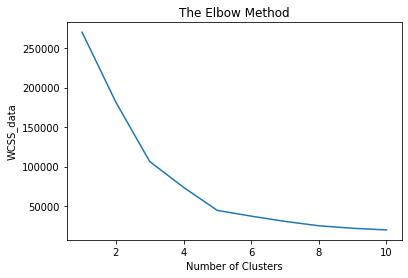

In [ ]:
srt_data=mall_data.iloc[:,[3,4]].values

from sklearn.cluster import KMeans
wcss_data=[]  #within-cluster sum of square

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=7)
    kmeans.fit(srt_data)
    wcss_data.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_data)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS_data')
plt.show()

From the above figure, we can see that last most significant slope occurs at k = 5 , hence we will have 5 clusters in this case.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaled_data = scaler.fit_transform(mall_data[["Annual Income (k$)",
                                              "Spending Score (1-100)"]])
scaled_data[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [ ]:
clusters = KMeans(5)
clusters.fit(scaled_data)
mall_data["new_clusterid"]= clusters.labels_
mall_data.groupby("new_clusterid")["Annual Income (k$)",
                                   "Spending Score (1-100)"
                                   ].agg(["mean",'std']).reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


new_clusterid Annual Income (k$)            Spending Score (1-100)           
                              mean        std                   mean        std
0             0          55.296296   8.988109              49.518519   6.530909
1             1          86.538462  16.312485              82.128205   9.364489
2             2          25.727273   7.566731              79.363636  10.504174
3             3          26.304348   7.893811              20.913043  13.017167
4             4          88.200000  16.399067              17.114286   9.952154

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


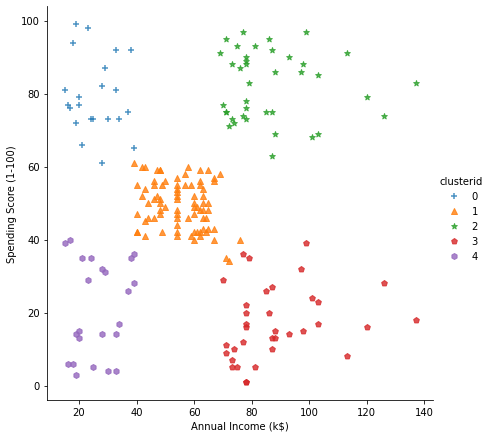

In [ ]:
from sklearn.cluster import KMeans
clusters = KMeans(5)
clusters.fit(scaled_data)
mall_data["clusterid"]=clusters.labels_
markers=['+','^','*','p','h']
sn.lmplot("Annual Income (k$)","Spending Score (1-100)",
          data=mall_data,
          hue="clusterid",fit_reg=False,markers=markers,size=6)

